<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/whitenoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelling & Analyzing (Gaussian) White Noise Processes

# What is a white noise process?

* Follow a stationary process
* Is normally distributed
* No autocorrelation present

# Create White Noise Process

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from scipy import stats
from random import gauss
from random import seed
from pandas import Series
from statsmodels.tsa.stattools import adfuller
import scipy
from pandas.plotting import autocorrelation_plot

In [0]:
seed(1)
series = [gauss(0.0, 1.0) for i in range(5000)]
series = Series(series)

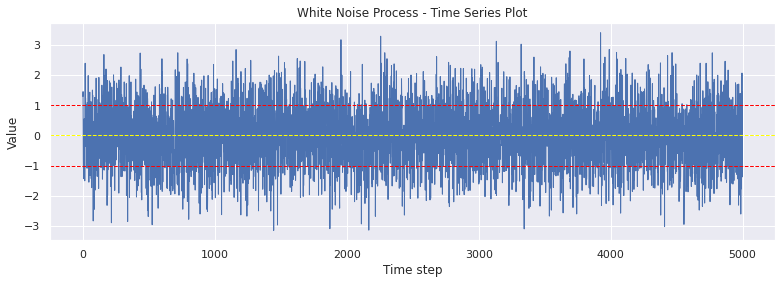

In [5]:
sns.set(rc={'figure.figsize':(13, 4)})
series.plot(linewidth=1.0,title='White Noise Process - Time Series Plot')
plt.ylabel('Value')
plt.xlabel('Time step')
plt.axhline(y=1, color='red', linestyle='--', linewidth=1.0);
plt.axhline(y=-1, color='red', linestyle='--', linewidth=1.0);
plt.axhline(y=0, color='yellow', linestyle='--', linewidth=1.0);

In [6]:
series.describe(percentiles=[0.05, 0.95])

count    5000.000000
mean       -0.000236
std         0.991748
min        -3.149965
5%         -1.663347
50%        -0.006930
95%         1.656811
max         3.400552
dtype: float64

In [7]:
series.skew()

-0.0016091089287099047

In [8]:
series.kurt()

-0.09071155957325949

In [9]:
series.quantile(0.95)

1.6568108448621937

# **What is the distribution?**

<font color='blue'>**Hypothesis**: Gaussian white noise follows a normal distribution</font>

**Distribution Plot**

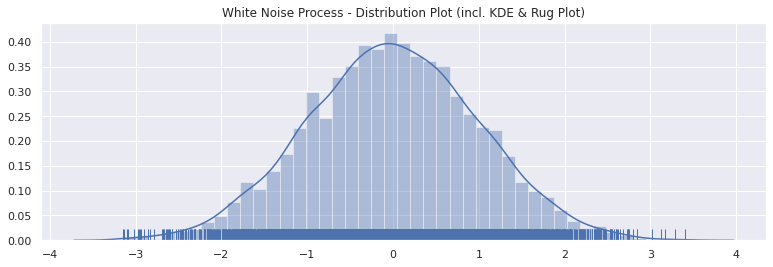

In [10]:
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((series), hist=True, rug=True).set_title('White Noise Process - Distribution Plot (incl. KDE & Rug Plot)')
plt.show()

**KDE Plot**

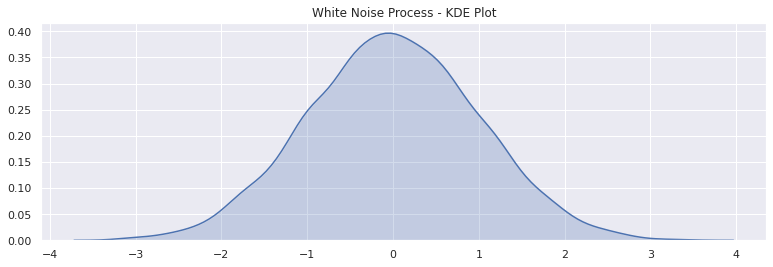

In [11]:
sns.set(rc={'figure.figsize':(13, 4)})
sns.kdeplot(series, shade=True).set_title('White Noise Process - KDE Plot')
plt.show()

**Boxplot**

Text(0.5, 1.0, 'White Noise Process - Boxplot')

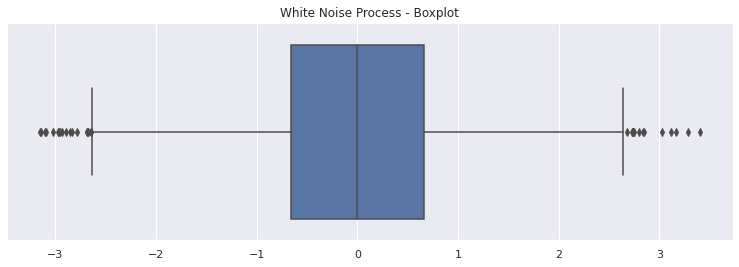

In [12]:
sns.boxplot(series).set_title('White Noise Process - Boxplot')

**QQ Plot**

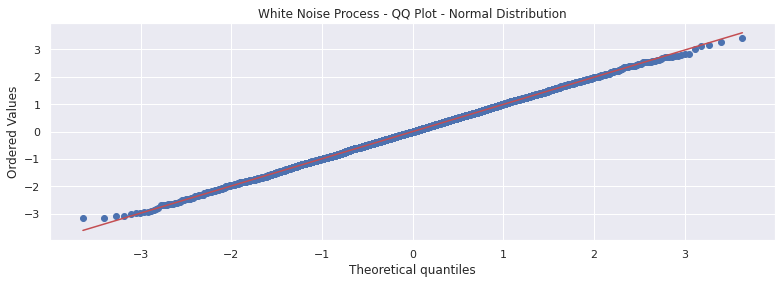

In [13]:
stats.probplot(series, dist="norm", plot=plt)
plt.title('White Noise Process - QQ Plot - Normal Distribution')
plt.show()

**Kolmogorov-Smirnov Test**

* Test of the distribution G(x) of an observed random variable against a given distribution F(x) (quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples.)
* Under null hypothesis the two distributions are identical, G(x)=F(x).
* Only works if the mean and the variance of the normal are assumed known under the null hypothesis

In [14]:
stats.kstest(series, 'norm')

KstestResult(statistic=0.007346348189596064, pvalue=0.9501135712240549)

P-value > 0.05. Don't reject HO. Distribution is normal.

**Jarque-Bera Test**

* Compares sample skewness and kurtosis to 0 and 3, their values under normality.
* This test only works for a large enough number of data samples (>2000) as the test statistic asymptotically has a Chi-squared distribution with 2 degrees of freedom.
* Null hypothesis: sample is normal distributed.
* The test has weakness. In particular, the test has low power for distributions with short tails, especially for bimodal distributions. Some authors have declined to include its results in their studies because of its poor overall performance

In [15]:
stats.jarque_bera(series)

(1.7586207168611774, 0.41506906187895287)

P-value > 0.05. Don't reject HO. Distribution is normal.

**Anderson-Darling Test**

* Anderson Darling tests the null hypothesis whether the sample from the population follows a particular distribution (default: normal).
* For the Anderson-Darling test, the critical values depend on which distribution is being tested against. 
* This function works for normal, exponential, logistic, or Gumbel (Extreme Value Type I) distributions.



In [16]:
stats.anderson(series)

AndersonResult(statistic=0.17225517577207938, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

P-value > 0.05. Don't reject HO. Distribution is normal.

**Shapiro–Wilk Test**

* tests the null hypothesis that the data was drawn from a normal distribution.
* Monte Carlo simulation has found that Shapiro–Wilk has the best power for a given significance, followed closely by Anderson–Darling when comparing the Shapiro–Wilk, Kolmogorov–Smirnov, Lilliefors and Anderson–Darling tests.
* For N > 5000 the W test statistic is accurate but the p-value may not be.
* The chance of rejecting the null hypothesis when it is true is close to 5% regardless of sample size.

In [24]:
stats.shapiro(series)

(0.9996960163116455, 0.6947302222251892)

P-value > 0.05. Don't reject HO. Distribution is normal

**Normal Test**

* Test whether a sample differs from a normal distribution.
* This function tests the null hypothesis that a sample comes from a normal distribution. 
* It is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality.
* Historically, the third and fourth standardized moments (skewness and kurtosis) were some of the earliest tests for normality.

In [28]:
scipy.stats.normaltest(series)

NormaltestResult(statistic=1.7988694985198506, pvalue=0.40679953850510986)

P-value > 0.05. Don't reject HO. Distribution is normal

# **Is there autocorrelation?**

<font color='blue'>**Hypothesis**: There is no autocorrelation</font>

**Autocorrelation Plot**

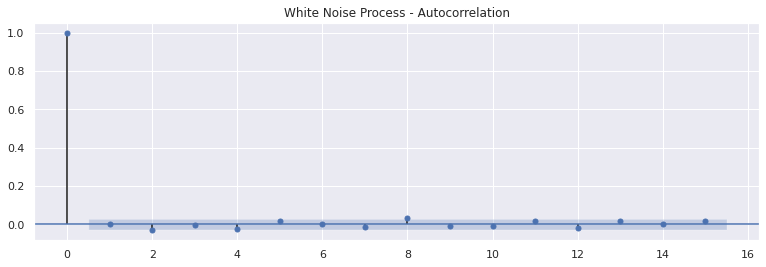

In [17]:
sns.set(rc={'figure.figsize':(13, 4)})
sm.graphics.tsa.plot_acf(series.squeeze(), lags=15)
plt.title('White Noise Process - Autocorrelation')
plt.show()

**Partial Autocorrelation Lag Plot**

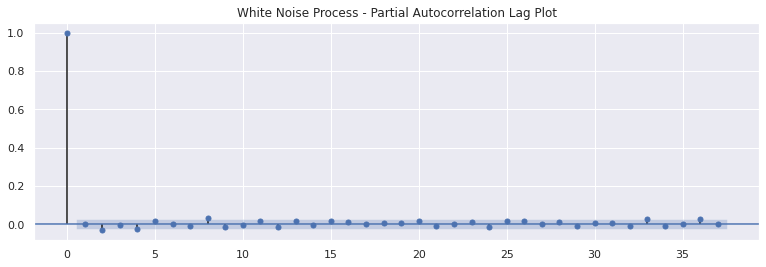

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series)
plt.title('White Noise Process - Partial Autocorrelation Lag Plot')
plt.show()

**Lag Plot**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


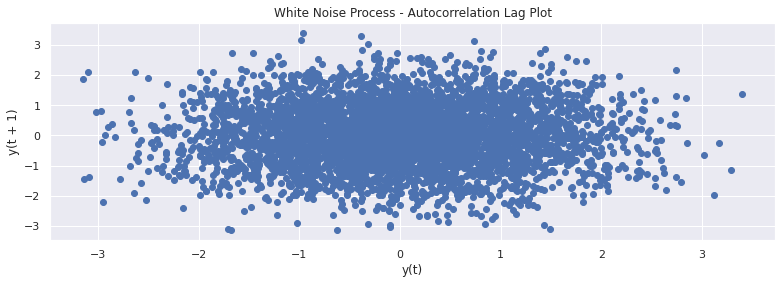

In [19]:
from pandas.plotting import lag_plot
lag_plot(series)
plt.title('White Noise Process - Autocorrelation Lag Plot')
plt.show()

**Durban-Watson Statistic**

* The null hypothesis of the test is that there is no serial correlation
* This statistic will always be between 0 and 4. 
* The closer to 0 the statistic, the more evidence for positive serial correlation. 
* The closer to 4, the more evidence for negative serial correlation.
* Close to 2 means no autocorrelation present

In [30]:
statsmodels.stats.stattools.durbin_watson(series, axis=0)

1.9987315315980172

Test statistic is close to 2. There is no autocorrelation present.

**Ljung-Box Q Statistic**

* Returns Ljung-Box Q-statistic for autocorrelation parameters and p-value
* Designed to be used with acf (to obtain autocorrelation coefficients)
* Examining the null hypothesis of independence in a given time series.
* Instead of testing randomness at each distinct lag, it tests the "overall" randomness based on a number of lags, and is therefore a portmanteau test.

In [35]:
statsmodels.tsa.stattools.q_stat(series, nobs=5000, type='ljungbox')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:469: RuntimeWarning: divide by zero encountered in true_divide
  np.cumsum((1. / (nobs - np.arange(1, len(x) + 1))) * x**2))


(array([8.30207905e+03, 1.88149488e+04, 1.88369731e+04, ...,
        2.58946925e+08, 2.86534649e+08,            inf]),
 array([0., 0., 0., ..., 0., 0., 0.]))

P-value is zero. Reject H0. Series is not independent.

**BDS Independence Test**

* BDS test statistic for independence of a time series
* Time Series is IID (= Null Hypothesis)

In [33]:
statsmodels.tsa.stattools.bds(series, max_dim=2, epsilon=None, distance=1.5)

(array(2.20528503), array(0.0274341))

P-value is < 0.05. Series is not IID.

# **Is the series stationarity?**

**Relevance**: 
* Certain statistical tests demand stationarity (e.g. Granger causality test)
* Especially classic time series models demand stationarity, otherwise forecasts are biased.

**Hypothesis**: 
* There is no unit root (series is stationary).


**Augmented Dickey Fuller Test**

* The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.
* H0: There is a unit root for the series (non stationary).

Choose regression {‘c’,’ct’,’ctt’,’nc’} - Constant and trend order to include in regression.
* ‘c’ : constant only (default).
* 'ct’ : constant and trend.
* ctt’ : constant, and linear and quadratic trend.
* 'nc’ : no constant, no trend.

In [37]:
statsmodels.tsa.stattools.adfuller(series, maxlag=None, regression='nc', autolag='AIC', store=False, regresults=False)

(-51.65895448102033,
 0.0,
 1,
 4998,
 {'1%': -2.566187484131708,
  '10%': -1.6167669671872418,
  '5%': -1.9410538759542593},
 14019.26673266961)

P-value is zero. Reject H0. Series is stationary.

**KPSS - Level Stationarity Test**

‘c’ : The data is stationary around a constant (default).

H0 = Stationary (Stochastic Trend). H1 = Non-Stationary (Unit Root)

Reject H0 if p-value of less than 5% and test stats higher than provided critical values

In [0]:
statsmodels.tsa.stattools.kpss(series, regression='c', lags='auto', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.0817744274787518,
 0.1,
 1,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

Test statistics at 0.07 is not more extreme than the provided critical value of 0.46 for 5%. p-value is not below 0.05. Do not reject H0. Process is stationary around a constant.


**KPSS - Trend Stationary Test**

‘ct’ : The data is stationary around a trend.

H0 = Deterministic Trend. H1 = Non-Stationary (Unit Root)

Reject H0 if p-value of less than 5% and test stats higher than provided critical values

In [0]:
statsmodels.tsa.stattools.kpss(series, regression='ct', lags='auto', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.08072962002899656,
 0.1,
 1,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

Test statistics is smaller than provided critical value of 0.146. p-value is at 0.1 (“not significant”). Do not reject H0.

Summary: Both test show no unit root. Time series is either trend or level stationary.